# Multiclass Classification 

Some ML algorithms cannot handle multi class problems, and thus binary classifiers can be used to solve multiclass problems using a One-versus-all (OvA) strategy, or a One-verse-One (OvO) strategy.


### How to use a binary classifer for Multi class problem.
ScikitLearn allows for both OvA and OvO approaches using OneVsOneClassifier or OneVsRestClassifier classes.

In [10]:
# The MNist Dataset
from sklearn.datasets import fetch_mldata
import numpy as np

mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

# Let's split the dataset into the predefined train and test sets.
# Train = first 60,00 images, Test = last 10,000 images
X_train, X_test, y_train, y_test = X[:60000], X[6000:], y[:60000], y[60000:]

# Next let's shuffle the training dataset to ensure it's not stored in an order fassion.
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

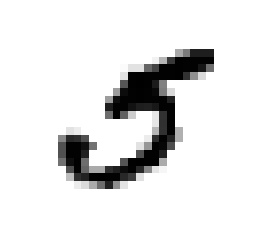

label: 5.0


In [12]:
# Let's take a look at one of the records
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28) # rehape row into the 28 by 28 pixel representation

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
print("label: " + str(y[36000]))

In [19]:
# Let's try to use a binary model

from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier

sgd_ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
sgd_ovo_clf.fit(X_train, y_train)
print(sgd_ovo_clf.predict([some_digit]))

print("We needed this many binary models: ", len(ovo_clf.estimators_))

[ 5.]
We needed this many binary models:  45


In [15]:
# Now let's try an algorithm that is capable of handling multi class problems.

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [18]:
# you can get the list of probabilities for each label
forest_clf.predict_proba([some_digit])

array([[ 0.2,  0. ,  0.1,  0. ,  0. ,  0.7,  0. ,  0. ,  0. ,  0. ]])

In [23]:
# Now let's check the peformance of the sgd model
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_ovo_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([ 0.90606879,  0.91469573,  0.90448567])

In [26]:
# We can improve the model by simply scaling the inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_ovo_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.91461708,  0.91979599,  0.9173376 ])

### Error Analysis
We'll skip the rest of pre-processing and model tuning, and go straight to the evaulation stage.

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_ovo_clf, X_train_scaled, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

array([[5657,    1,   36,   11,   12,   83,   56,    5,   50,   12],
       [   2, 6492,   42,   35,    7,   47,    5,   21,   78,   13],
       [  21,   37, 5458,   97,   67,   25,   56,   38,  142,   17],
       [  12,   18,  164, 5402,    5,  249,    6,   49,  184,   42],
       [   6,   17,   57,    8, 5394,   18,   34,   23,   42,  243],
       [  33,   13,   45,  182,   27, 4785,   75,   15,  194,   52],
       [  31,    9,   92,    9,   41,  118, 5559,    1,   58,    0],
       [   9,   15,   97,   42,   66,    8,    3, 5813,   29,  183],
       [  24,   68,   76,  166,   15,  150,   31,   19, 5245,   57],
       [  15,   17,   27,   53,  181,   39,    2,  307,   78, 5230]])

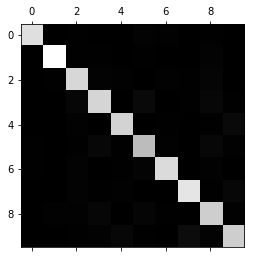

In [31]:
# Now let's show the confusion matrix as an image
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

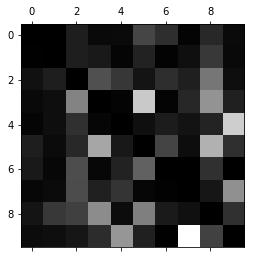

In [33]:
# Now let's focus the plot on the errors. First, we need to divide each value in the cm by the number of 
# observations in each class to compare the error rates rather than the absolute errors.

row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums

np.fill_diagonal(norm_conf_matrix, 0) # fill diagonal with zeros, to keep only the errors.
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()

NameError: name 'plot_digits' is not defined

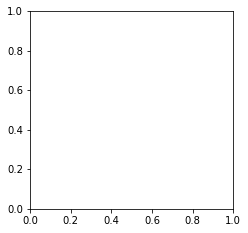

In [34]:
# Let's plot some examples of 3s and 5s (these look like they are getting mixed up in the classification)
cl_a, cl_b = 3, 5

#posible combinations of erors (and correct)
x_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
x_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
x_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

### Multilable Classification
A classification system that outputs multiple binary lables.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
# Now make a multilabel predicition
print(knn_clf.predict([some_digit]))

[[False  True]]


In [45]:
#  A common metric for multilable classification is the average F1 score across each label
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

NameError: name 'f1_score' is not defined

In [ ]:
# The above method assumes each label is equally important, which may not be the case. A simple option is to assign weights
# equal to its support (the number of instances with that target label). To do this we would use average="weighted".

### Multioutput Classification
This is similar to multilabel classification where each label can be multiclass (i.e. it can have more than two possible values).

In [ ]:
# Let's build a system that removes noise fromo images, so it will take a noisy digit image 
# and hopefully output a clean digit image.

noise = np.random.randint(0, 100, len(X_train), 784)
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, len(X_test), 784)
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mode = X_test

In [ ]:
noise[:3]

In [ ]:
# Let's take a look at the test data.
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)